In [2]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  # For interactive maps 

# Set visual style
plt.style.use('ggplot')
%matplotlib inline

In [3]:
# Load COVID-19 data directly from Our World in Data
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url)

# Verify data loaded
print("✅ Data loaded successfully!")
print(f"📅 Date range: {df['date'].min()} to {df['date'].max()}")
print(f"🌍 Countries: {df['location'].nunique()}")
df.head(3)

✅ Data loaded successfully!
📅 Date range: 2020-01-01 to 2024-08-14
🌍 Countries: 255


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [4]:
# Create a clean copy of the data
covid = df.copy()

# Convert date column to datetime
covid['date'] = pd.to_datetime(covid['date'])

# Select key columns and countries
countries = ['Kenya', 'United States', 'India', 'Brazil', 'Germany']
cols = ['date', 'location', 'total_cases', 'new_cases', 'total_deaths', 'people_vaccinated']

# Filter and clean
covid_clean = covid.loc[covid['location'].isin(countries), cols].dropna(subset=['total_cases'])

# Calculate death rate
covid_clean['death_rate'] = (covid_clean['total_deaths'] / covid_clean['total_cases'] * 100).round(2)

# Show cleaned data
covid_clean.head()

,date,location,total_cases,new_cases,total_deaths,people_vaccinated,death_rate
50234,2020-01-05,Brazil,0.0,0.0,0.0,NaN,NaN
50235,2020-01-06,Brazil,0.0,0.0,0.0,NaN,NaN
50236,2020-01-07,Brazil,0.0,0.0,0.0,NaN,NaN
50237,2020-01-08,Brazil,0.0,0.0,0.0,NaN,NaN
50238,2020-01-09,Brazil,0.0,0.0,0.0,NaN,NaN


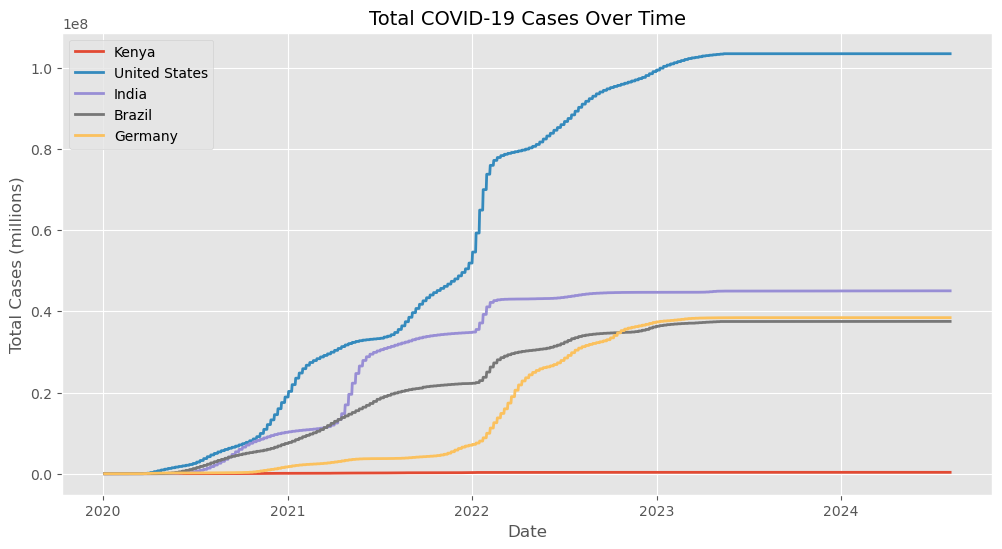

In [5]:
# Plot total cases over time
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = covid_clean[covid_clean['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country, linewidth=2)

plt.title('Total COVID-19 Cases Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Cases (millions)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

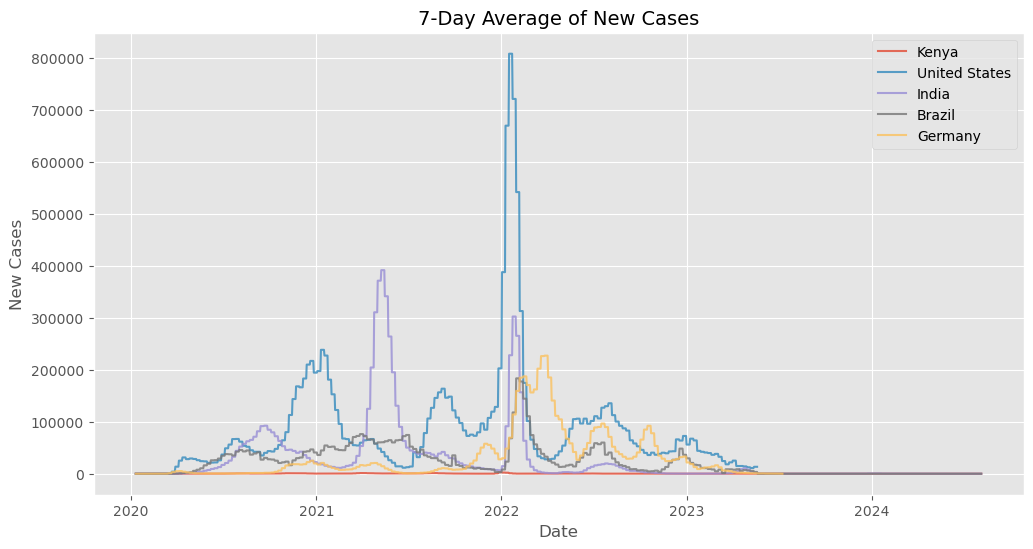

In [6]:
# Weekly rolling average of new cases
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = covid_clean[covid_clean['location'] == country]
    plt.plot(country_data['date'], 
             country_data['new_cases'].rolling(7).mean(), 
             label=country, alpha=0.8)

plt.title('7-Day Average of New Cases', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('New Cases', fontsize=12)
plt.legend()
plt.show()

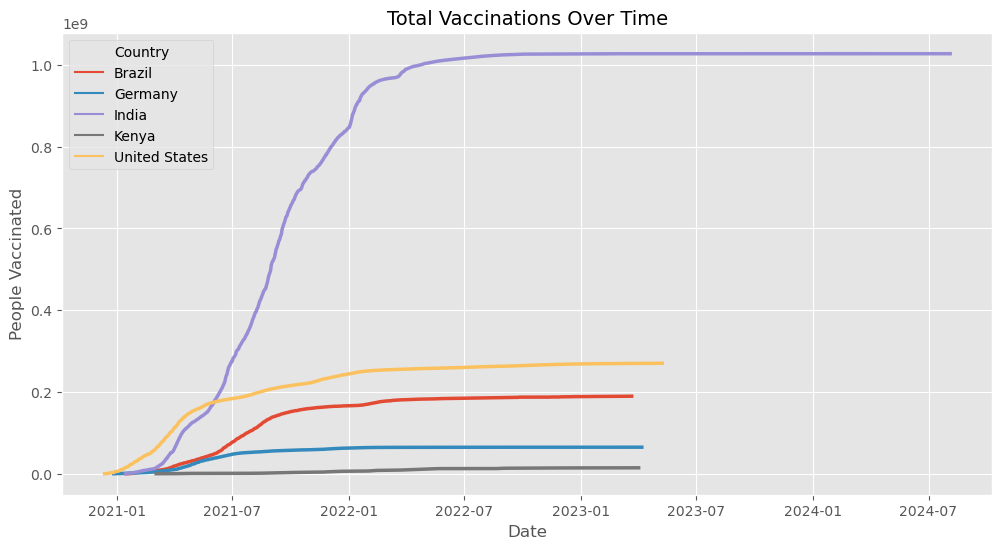

In [7]:
# Vaccination progress comparison
vaccine_data = covid_clean.dropna(subset=['people_vaccinated'])

plt.figure(figsize=(12, 6))
sns.lineplot(data=vaccine_data, 
             x='date', 
             y='people_vaccinated', 
             hue='location',
             linewidth=2.5)

plt.title('Total Vaccinations Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('People Vaccinated', fontsize=12)
plt.legend(title='Country')
plt.show()

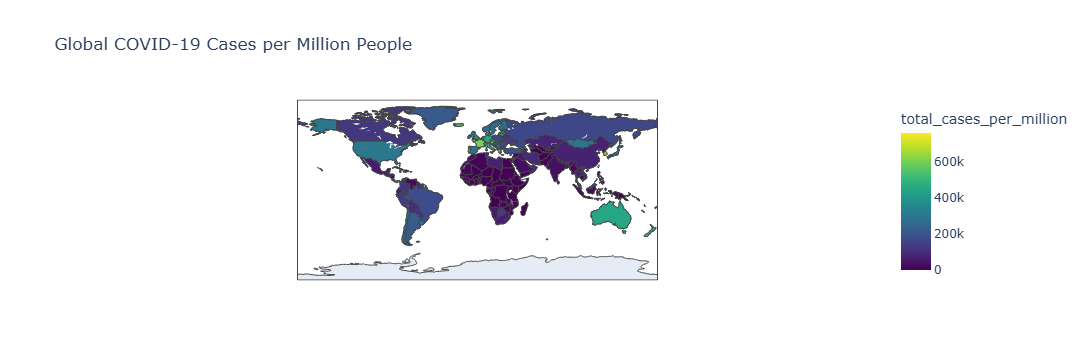

In [9]:
# Get latest data for each country
latest_data = covid.sort_values('date').groupby('location').last().reset_index()

# Create interactive world map
fig = px.choropleth(latest_data,
                    locations="iso_code",
                    color="total_cases_per_million",
                    hover_name="location",
                    hover_data=["total_cases", "total_deaths"],
                    color_continuous_scale='Viridis',
                    title="Global COVID-19 Cases per Million People")

fig.show()

In [10]:
vaccine_leaders = latest_data.sort_values('people_vaccinated_per_hundred', ascending=False).head(5)
print("🏆 Top 5 Vaccinated Countries (per 100 people):")
vaccine_leaders[['location', 'people_vaccinated_per_hundred']]

🏆 Top 5 Vaccinated Countries (per 100 people):


,location,people_vaccinated_per_hundred
85,Gibraltar,129.07
227,Tokelau,116.38
184,Qatar,105.83
237,United Arab Emirates,105.83
154,Nauru,103.27
